In [76]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style("dark")
sns.set(color_codes=True)
%matplotlib inline

In [77]:
# Import the Uber Request data as provided
uber = pd.read_csv("C:\\Users\\ravin\\Desktop\\Uber Request Data.csv")

In [78]:
#Check if the import is proper by shape and checking first 10 rows
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [79]:
uber.shape

(6745, 6)

In [80]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [81]:
#Few column names have space in them.Replacing with "_" to avoid any issues later.
uber = uber.rename(columns={"Request id":"Request_id","Pickup point":"Pickup_point","Driver id":"Driver_id","Request timestamp":"Request_timestamp","Drop timestamp":"Drop_timestamp"})

In [82]:
#Check the null values.Only 2 columns Driver_id and Drop_timestamp have null values
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [83]:
#drop_na(Drop_timestamp is null) and driver_na(Driver_id is null) created temporarily for analyzing the NaN values
drop_na = uber[pd.isnull(uber["Drop_timestamp"])]
driver_na = uber[pd.isnull(uber["Driver_id"])]

In [84]:
#Grouped the null values in drop_na by status.There is 3954 null values as 1264 request were cancelled and 2650 had no car available.
drop_na.groupby("Status").Request_id.count()

Status
Cancelled            1264
No Cars Available    2650
Name: Request_id, dtype: int64


Grouped the null values driver_na by status.All the null values are for "No Cars available" only and that makes sense.It also mathches with null values for "No Cars available" above.These null values should be kept as is and should not be removed as it would required later and is essential for analysis.

In [85]:
driver_na.groupby("Status").Request_id.count()

Status
No Cars Available    2650
Name: Request_id, dtype: int64

Request_timestamp and Drop_timestamp have dates in two formats - one with "/" separator and other with "-" separator.Replaced all "/" with "-" to simplify conversion into datetime. Checked that the timestamps are in single format now and no. of null values is same as before.

In [86]:
uber[["Request_timestamp","Drop_timestamp"]]

,Request_timestamp,Drop_timestamp
0,11/7/2016 11:51,11/7/2016 13:00
1,11/7/2016 17:57,11/7/2016 18:47
2,12/7/2016 9:17,12/7/2016 9:58
3,12/7/2016 21:08,12/7/2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
5,13-07-2016 21:57:28,13-07-2016 22:28:59
6,14-07-2016 06:15:32,14-07-2016 07:13:15
7,15-07-2016 05:11:52,15-07-2016 06:07:52
8,15-07-2016 17:57:27,15-07-2016 18:50:51
9,11/7/2016 6:46,11/7/2016 7:25


In [87]:
uber["Request_timestamp"] = uber["Request_timestamp"].str.replace("/","-")
uber["Drop_timestamp"] = uber["Drop_timestamp"].str.replace("/","-")

In [88]:
uber[["Request_timestamp","Drop_timestamp"]]

,Request_timestamp,Drop_timestamp
0,11-7-2016 11:51,11-7-2016 13:00
1,11-7-2016 17:57,11-7-2016 18:47
2,12-7-2016 9:17,12-7-2016 9:58
3,12-7-2016 21:08,12-7-2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
5,13-07-2016 21:57:28,13-07-2016 22:28:59
6,14-07-2016 06:15:32,14-07-2016 07:13:15
7,15-07-2016 05:11:52,15-07-2016 06:07:52
8,15-07-2016 17:57:27,15-07-2016 18:50:51
9,11-7-2016 6:46,11-7-2016 7:25


In [89]:
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [90]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop_timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB



Used "to_datetime" with dayfirst to convert the timestamps into datetime datatype.Earlie they were in dd-mm-yyy hh:mm:ss format and after conversion they are in yyyy-mm-dd hh:mm:ss format.Also verified the same by printing timestamps, checking null values and using info to check datatype.

In [91]:
uber["Request_timestamp"] = pd.to_datetime(uber["Request_timestamp"],dayfirst=True)
uber["Drop_timestamp"] = pd.to_datetime(uber["Drop_timestamp"],dayfirst=True)

In [92]:
uber[["Request_timestamp","Drop_timestamp"]]

,Request_timestamp,Drop_timestamp
0,2016-07-11 11:51:00,2016-07-11 13:00:00
1,2016-07-11 17:57:00,2016-07-11 18:47:00
2,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2016-07-12 21:08:00,2016-07-12 22:03:00
4,2016-07-13 08:33:16,2016-07-13 09:25:47
5,2016-07-13 21:57:28,2016-07-13 22:28:59
6,2016-07-14 06:15:32,2016-07-14 07:13:15
7,2016-07-15 05:11:52,2016-07-15 06:07:52
8,2016-07-15 17:57:27,2016-07-15 18:50:51
9,2016-07-11 06:46:00,2016-07-11 07:25:00


In [93]:
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [25]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB



Although that was checked visullay but confirmed that all the values in drop and request timestamp are for year 2016 and July month only. As per the problem statement we need to see the trips as per the dates and hours and then create Type Driven Derived metrics as per the requirement.We have unique dates from 11 to 15 and hours from 0 to 23.We would need to create 4 new columns:Request_date,Request_hour,Drop_date,Drop_hour.

In [94]:
pd.DatetimeIndex(uber["Request_timestamp"]).year.unique()

Int64Index([2016], dtype='int64', name='Request_timestamp')

In [95]:
pd.DatetimeIndex(uber["Request_timestamp"]).month.unique()

Int64Index([7], dtype='int64', name='Request_timestamp')

In [96]:
pd.DatetimeIndex(uber["Drop_timestamp"]).year.unique()

Float64Index([2016.0, nan], dtype='float64', name='Drop_timestamp')

In [97]:
pd.DatetimeIndex(uber["Drop_timestamp"]).month.unique()

Float64Index([7.0, nan], dtype='float64', name='Drop_timestamp')

In [98]:
pd.DatetimeIndex(uber["Request_timestamp"]).day.unique()

Int64Index([11, 12, 13, 14, 15], dtype='int64', name='Request_timestamp')

In [99]:
pd.DatetimeIndex(uber["Drop_timestamp"]).day.unique()

Float64Index([11.0, 12.0, 13.0, 14.0, 15.0, 16.0, nan], dtype='float64', name='Drop_timestamp')

In [100]:
pd.DatetimeIndex(uber["Request_timestamp"]).hour.unique().sort_values(ascending=False)

Int64Index([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
             6,  5,  4,  3,  2,  1,  0],
           dtype='int64', name='Request_timestamp')

In [101]:
pd.DatetimeIndex(uber["Drop_timestamp"]).hour.unique().sort_values(ascending=False)

Float64Index([ nan, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0,
              13.0, 12.0, 11.0, 10.0,  9.0,  8.0,  7.0,  6.0,  5.0,  4.0,  3.0,
               2.0,  1.0,  0.0],
             dtype='float64', name='Drop_timestamp')

In [102]:
uber["Request_date"] = pd.DatetimeIndex(uber["Request_timestamp"]).day
uber["Request_hour"] = pd.DatetimeIndex(uber["Request_timestamp"]).hour
uber["Drop_date"] = pd.DatetimeIndex(uber["Drop_timestamp"]).day
uber["Drop_hour"] = pd.DatetimeIndex(uber["Drop_timestamp"]).hour

As per the problem statement, time taken to complete a trip needs to be added.Trip_length added as Business driven derived metrics.Checked that the null values are same as above and also checked the info to see the total couluns and their data types.

In [103]:
uber["Trip_length"]= round(((uber["Drop_timestamp"] - uber["Request_timestamp"]).dt.total_seconds()/60),0)

Demand and Supply Assumption :
Demand is defined as total number of requests received at any pickup point irrespective of status
Supply is defined as requests with Trip Completed status at any pickup point.

Demand = Trip Completed + Cancelled + No Cars Available
Supply = Trip Completed
Cancelled requests were not considered as part of Supply as is not clear if the requests is cancelled by Driver or Requestor but the end result is that demand is not met.

In [104]:
# Demand column created  as a business driven metric.Defult value of 1 given and verified the sum matched to count of unique request_ids.
uber["Demand"] = 1
uber.Demand.sum()

6745

In [105]:
# Supply column created  as a business driven metric and is equal to number of trips completed
uber['Supply'] = (uber['Status']=='Trip Completed').astype(int)
uber['Supply'].sum()

2831

In [145]:
# Creating business driven variable 'Demand_Supply_gap' as Demand - Supply
uber["Demand_Supply_gap"] = uber["Demand"]-uber["Supply"]

In [148]:
uber

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,Drop_date,Drop_hour,Trip_length,Demand,Supply,Day_segment,Demand_Supply_gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,11.0,13.0,69.0,1,1,10AM-Before5PM,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,11.0,18.0,50.0,1,1,5PM-BeforeMidnight,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,12.0,9.0,41.0,1,1,5AM-Before10AM,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,12.0,22.0,55.0,1,1,5PM-BeforeMidnight,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,13.0,9.0,53.0,1,1,5AM-Before10AM,0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21,13.0,22.0,32.0,1,1,5PM-BeforeMidnight,0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6,14.0,7.0,58.0,1,1,5AM-Before10AM,0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5,15.0,6.0,56.0,1,1,5AM-Before10AM,0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,15.0,18.0,53.0,1,1,5PM-BeforeMidnight,0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,11,6,11.0,7.0,39.0,1,1,5AM-Before10AM,0


In [149]:
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
Request_date            0
Request_hour            0
Drop_date            3914
Drop_hour            3914
Trip_length          3914
Demand                  0
Supply                  0
Day_segment             0
Demand_Supply_gap       0
dtype: int64

In [150]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 15 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       2831 non-null datetime64[ns]
Request_date         6745 non-null int64
Request_hour         6745 non-null int64
Drop_date            2831 non-null float64
Drop_hour            2831 non-null float64
Trip_length          2831 non-null float64
Demand               6745 non-null int64
Supply               6745 non-null int32
Day_segment          6745 non-null object
Demand_Supply_gap    6745 non-null int64
dtypes: datetime64[ns](2), float64(4), int32(1), int64(5), object(3)
memory usage: 764.2+ KB


In [151]:
uber.shape

(6745, 15)

Univariate analysis on Request_id done.All the request ids are unique.The minimum value is 1 and and maximum value in 6766 however the count is 6745 indicating that request id is not sequential and there are missing values.

In [152]:
uber["Request_id"].describe()

count    6745.000000
mean     3384.644922
std      1955.099667
min         1.000000
25%      1691.000000
50%      3387.000000
75%      5080.000000
max      6766.000000
Name: Request_id, dtype: float64

In [153]:
len(uber["Request_id"])

6745

Univariate analysis on Pickup point is done.48% requests have pickup point of Airport and 51% have pickup point as City.The requests are distributed almost evenly between pickup points.

In [154]:
temp = uber.groupby("Pickup_point")["Request_id"].count().reset_index()
temp["Percentage"] = 100 * temp["Request_id"]/temp["Request_id"].sum()
temp

,Pickup_point,Request_id,Percentage
0,Airport,3238,48.00593
1,City,3507,51.99407


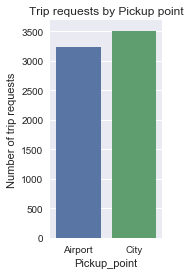

In [156]:
sns.set(font_scale=1)
plt.figure(figsize=(2, 4))
sns.countplot(x="Pickup_point", data=uber)
plt.title('Trip requests by Pickup point')
plt.ylabel('Number of trip requests')
plt.show()

Univariate analysis on Status is done.No cars available staus is very high and and is problematic.It is almost equal to Trip completed.Cancelled requests are also close to 19% and significant.The analysis indicates that only about 42% trip requested are completed.This needs to be investigated based on Pickup.points and hours


In [157]:
temp = uber.groupby("Status")["Request_id"].count().reset_index()
temp["Percentage"] = 100 * temp["Request_id"]/temp["Request_id"].sum()
temp

,Status,Request_id,Percentage
0,Cancelled,1264,18.739807
1,No Cars Available,2650,39.288362
2,Trip Completed,2831,41.971831


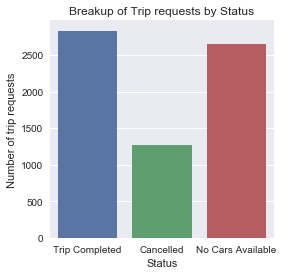

In [158]:
plt.figure(figsize=(4, 4))
sns.countplot(x="Status", data=uber)
plt.title('Breakup of Trip requests by Status')
plt.ylabel('Number of trip requests')
plt.show()

Univariate analysis on date is done.Number of requests is almost same on all the dates since they are all weekdays. Separate analysis is not required for all the dates.

In [159]:
uber.groupby("Request_date")["Request_id"].count().reset_index()

,Request_date,Request_id
0,11,1367
1,12,1307
2,13,1337
3,14,1353
4,15,1381


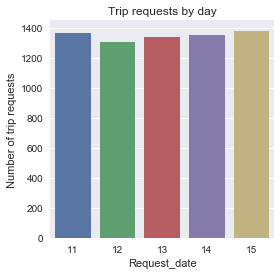

In [160]:
sns.set_style("darkgrid")
plt.figure(figsize=(4, 4))
sns.countplot(x="Request_date",data=uber)
plt.title('Trip requests by day')
plt.ylabel('Number of trip requests')
plt.show()

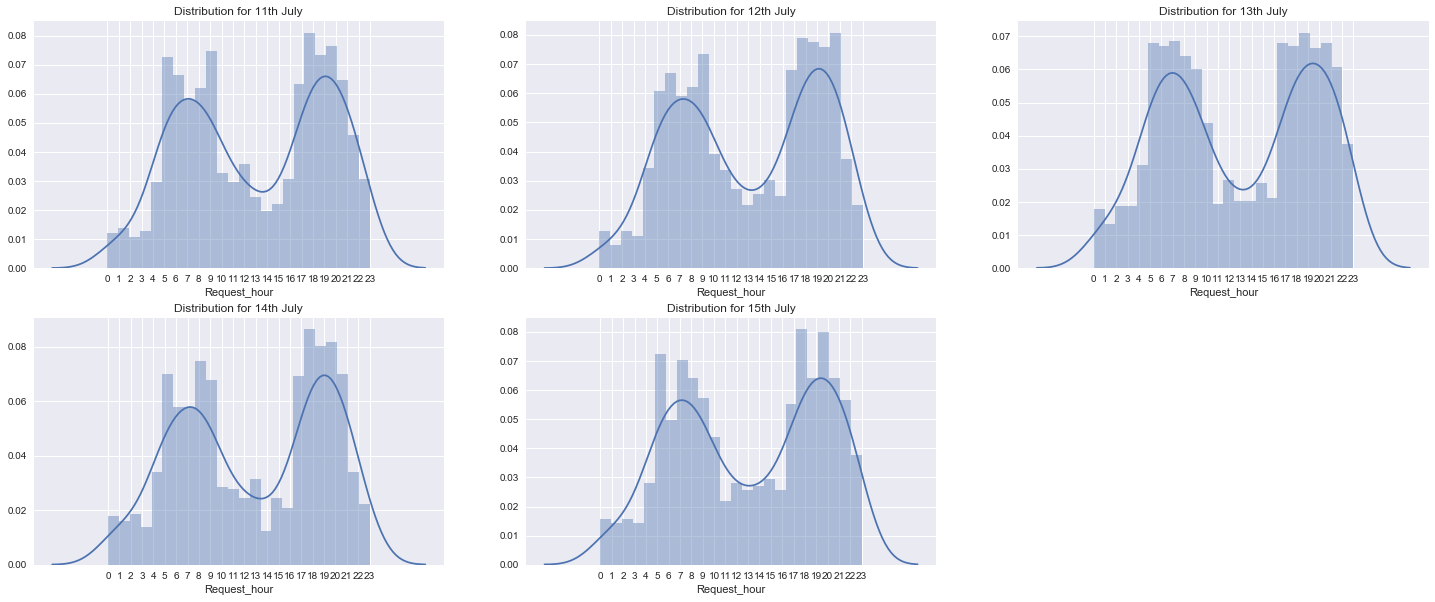

In [161]:
a=1
sns.set(font_scale=1)
plt.figure(figsize=(25, 10))
for i in range(11,16):
    plt.subplot(2, 3, a)
    plt.title('Distribution ' + "for " + str(i) + "th " + "July")
    sns.distplot(uber.loc[uber["Request_date"] == i,"Request_hour"],24)
    plt.xticks(np.arange(0,24,step=1))
    a+=1
plt.show()

Hourly distribution of requests on all the days is plotted as above and is observed that the pattern is nearly same for all the days.That is also confirmed by plotting the hourly distribution chart for the average requests from 11th July-15th July.

Text(0.5,1,'Average Trip requests by Hour')

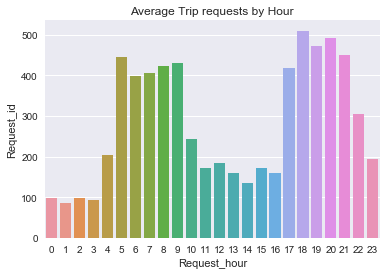

In [162]:
average_requests = uber.groupby("Request_hour").Request_id.count().reset_index()
sns.barplot(x="Request_hour",y="Request_id",data=average_requests)
plt.title('Average Trip requests by Hour')

In [163]:
def segment(hour):
    if((hour >= 0) & (hour < 5)):
        return "Midnight-Before5AM"
    elif((hour >= 5) & (hour < 10)):
        return "5AM-Before10AM"
    elif((hour >= 10) & (hour < 17)):
        return "10AM-Before5PM"
    else:
        return "5PM-BeforeMidnight"
uber["Day_segment"] = uber["Request_hour"].map(lambda hour: segment(hour))

In [164]:
uber.head(5)

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,Drop_date,Drop_hour,Trip_length,Demand,Supply,Day_segment,Demand_Supply_gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,11.0,13.0,69.0,1,1,10AM-Before5PM,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,11.0,18.0,50.0,1,1,5PM-BeforeMidnight,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,12.0,9.0,41.0,1,1,5AM-Before10AM,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,12.0,22.0,55.0,1,1,5PM-BeforeMidnight,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,13.0,9.0,53.0,1,1,5AM-Before10AM,0


In [165]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 15 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       2831 non-null datetime64[ns]
Request_date         6745 non-null int64
Request_hour         6745 non-null int64
Drop_date            2831 non-null float64
Drop_hour            2831 non-null float64
Trip_length          2831 non-null float64
Demand               6745 non-null int64
Supply               6745 non-null int32
Day_segment          6745 non-null object
Demand_Supply_gap    6745 non-null int64
dtypes: datetime64[ns](2), float64(4), int32(1), int64(5), object(3)
memory usage: 764.2+ KB


It was realized that there is a need to create 2 new dataframes with one containing only the Pickup_Point as Airport and other containing only the Pickup_point as City.

In [166]:
Airport_requests = uber.loc[uber.Pickup_point=="Airport"]
City_requests = uber.loc[uber.Pickup_point=="City"]

In [167]:
Airport_requests

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,Drop_date,Drop_hour,Trip_length,Demand,Supply,Day_segment,Demand_Supply_gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,11.0,13.0,69.0,1,1,10AM-Before5PM,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17,11.0,18.0,50.0,1,1,5PM-BeforeMidnight,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21,12.0,22.0,55.0,1,1,5PM-BeforeMidnight,0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21,13.0,22.0,32.0,1,1,5PM-BeforeMidnight,0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6,14.0,7.0,58.0,1,1,5AM-Before10AM,0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5,15.0,6.0,56.0,1,1,5AM-Before10AM,0
10,1467,Airport,2.0,Trip Completed,2016-07-12 05:08:00,2016-07-12 06:02:00,12,5,12.0,6.0,54.0,1,1,5AM-Before10AM,0
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,13,4,13.0,5.0,34.0,1,1,Midnight-Before5AM,0
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,13,17,13.0,18.0,58.0,1,1,5PM-BeforeMidnight,0
17,5335,Airport,2.0,Trip Completed,2016-07-14 22:24:13,2016-07-14 23:18:52,14,22,14.0,23.0,55.0,1,1,5PM-BeforeMidnight,0


In [168]:
City_requests

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,Drop_date,Drop_hour,Trip_length,Demand,Supply,Day_segment,Demand_Supply_gap
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9,12.0,9.0,41.0,1,1,5AM-Before10AM,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,13.0,9.0,53.0,1,1,5AM-Before10AM,0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,15.0,18.0,53.0,1,1,5PM-BeforeMidnight,0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,11,6,11.0,7.0,39.0,1,1,5AM-Before10AM,0
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,12,12.0,12.0,27.0,1,1,10AM-Before5PM,0
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,13,8,13.0,9.0,73.0,1,1,5AM-Before10AM,0
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,13,14,13.0,15.0,72.0,1,1,10AM-Before5PM,0
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,14,12,14.0,12.0,36.0,1,1,10AM-Before5PM,0
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:03,2016-07-14 22:25:19,14,21,14.0,22.0,62.0,1,1,5PM-BeforeMidnight,0
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,15,2,15.0,3.0,43.0,1,1,Midnight-Before5AM,0


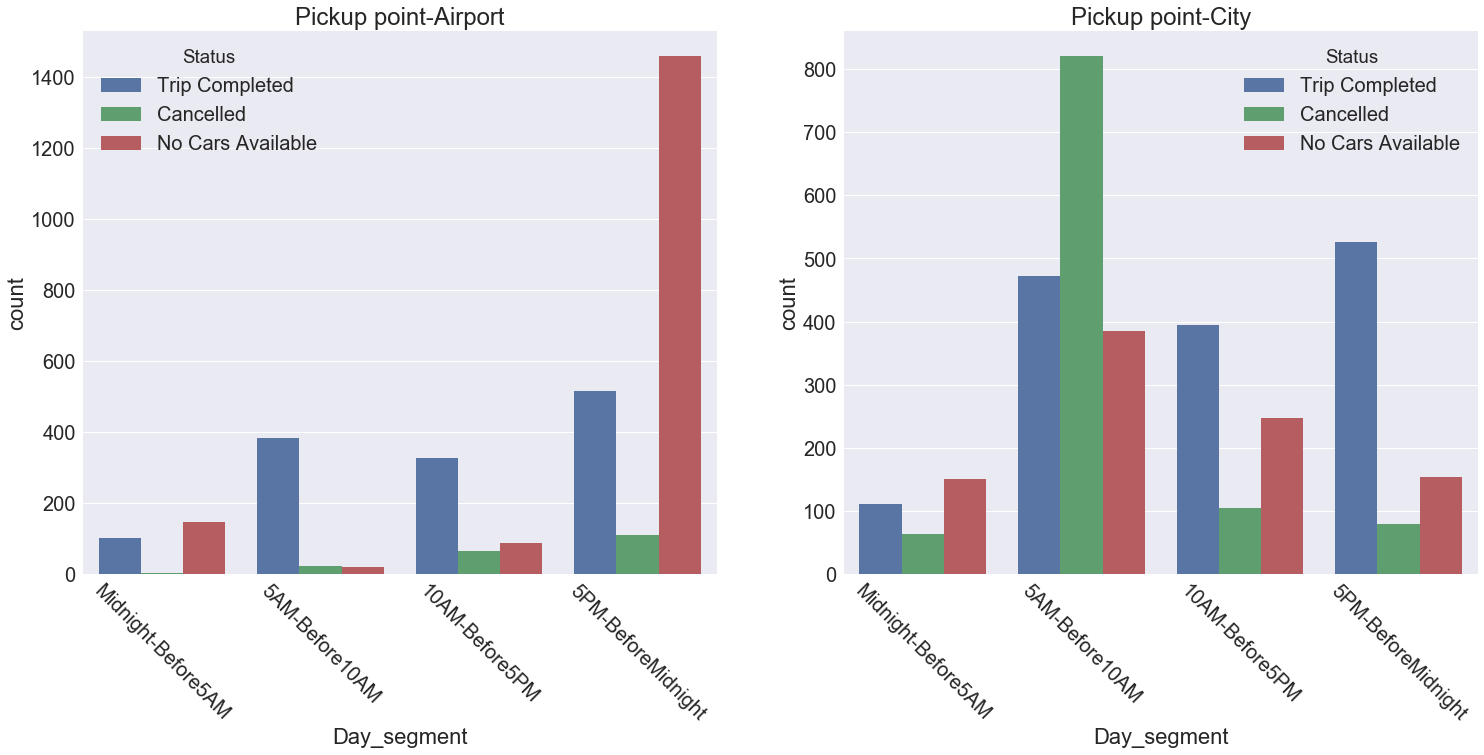

In [169]:
sns.set(font_scale=2)
plt.figure(figsize=(25, 10))
plt.subplot(121)
sns.countplot(x="Day_segment",hue="Status",data=Airport_requests,order=["Midnight-Before5AM","5AM-Before10AM","10AM-Before5PM","5PM-BeforeMidnight"])
plt.title("Pickup point-Airport")
plt.xticks(rotation=-45)
plt.subplot(122)
sns.countplot(x="Day_segment",hue="Status",data=City_requests,order=["Midnight-Before5AM","5AM-Before10AM","10AM-Before5PM","5PM-BeforeMidnight"])
plt.title("Pickup point-City")
plt.xticks(rotation=-45)
plt.show()

The above graph shows  the Demand-supply gap for both the pickup points.

Problem Identification & Cause :

For pickup point as Airport, we observe that "No Cars Available" status in 5PM - Before Midnight timeslot is increased to ~1450 from an average of 428 across all the 4 Day_segments.This is also the segment when number of request from Airport is highest.

For pickup point as City, we observe that "Cancelled" status in 5AM - Before 10AM timeslot is increased to ~825 from an average of 266 across all the 4 Day_segments.This is also the segment when number of request from Airport is highest.Secondary issue it is also seen that "No Cars Available" Status also increase from ~200 to 400.

Another graph is plotted below to show the depand supply gap across the Day sgements

In [199]:
Demand_Supply_Gap_Airport = Airport_requests.groupby(["Day_segment"]).Demand_Supply_gap.sum().reset_index()
Demand_Supply_Gap_City = City_requests.groupby(["Day_segment"]).Demand_Supply_gap.sum().reset_index()

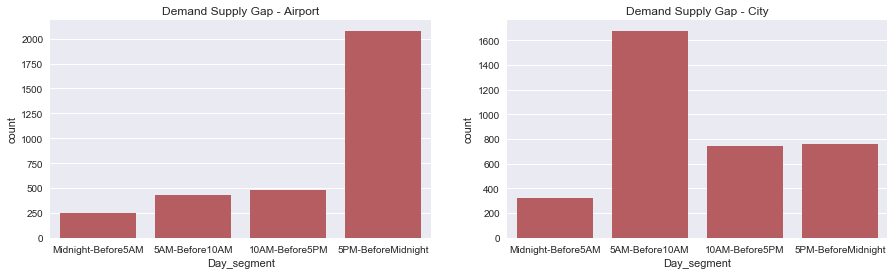

In [198]:
sns.set(font_scale=1)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Demand Supply Gap - Airport")
sns.countplot(x="Day_segment",data=Airport_requests,color="r",order=["Midnight-Before5AM","5AM-Before10AM","10AM-Before5PM","5PM-BeforeMidnight"])
plt.subplot(122)
plt.title("Demand Supply Gap - City")
sns.countplot(x="Day_segment",data=City_requests,color="r",order=["Midnight-Before5AM","5AM-Before10AM","10AM-Before5PM","5PM-BeforeMidnight"])
plt.show()



Created a pivot table to  cross-check the graph created for both the pickup points and alos to assist in final analysis.

In [200]:
Airport_Issue_Segment = Airport_requests.loc[Airport_requests.Day_segment=="5PM-BeforeMidnight"]
City_Issue_Segment = City_requests.loc[City_requests.Day_segment=="5AM-Before10AM"]

In [201]:
temp = Airport_Issue_Segment.groupby(["Request_date","Status"]).Request_id.count().unstack()
temp["Demand"] = temp["Cancelled"] + temp["No Cars Available"] + temp["Trip Completed"]
temp["Supply"] = temp["Trip Completed"]
temp

Status,Cancelled,No Cars Available,Trip Completed,Demand,Supply
Request_date,,,,,
11,26,283,110,419,110
12,21,297,90,408,90
13,27,265,118,410,118
14,18,329,89,436,89
15,17,283,108,408,108


In [202]:
temp = City_Issue_Segment.groupby(["Request_date","Status"]).Request_id.count().unstack()
temp["Demand"] = temp["Cancelled"] + temp["No Cars Available"] + temp["Trip Completed"]
temp["Supply"] = temp["Trip Completed"]
temp

Status,Cancelled,No Cars Available,Trip Completed,Demand,Supply
Request_date,,,,,
11,170,80,106,356,106
12,140,68,77,285,77
13,169,67,85,321,85
14,176,87,109,372,109
15,165,83,95,343,95


The cause of cancellation and unavailability of cars could be because of the time taken to complete a trip. Plotted a graph pickup point wise to understand if that could be an issue.It doesn't seems to be a problem because there is no specifi time slot where the time taken is  significantly higher than other slots.Distribution pattern is similar for all the timeslots.

Text(0.5,1,'Pickup point-City-Trip Length')

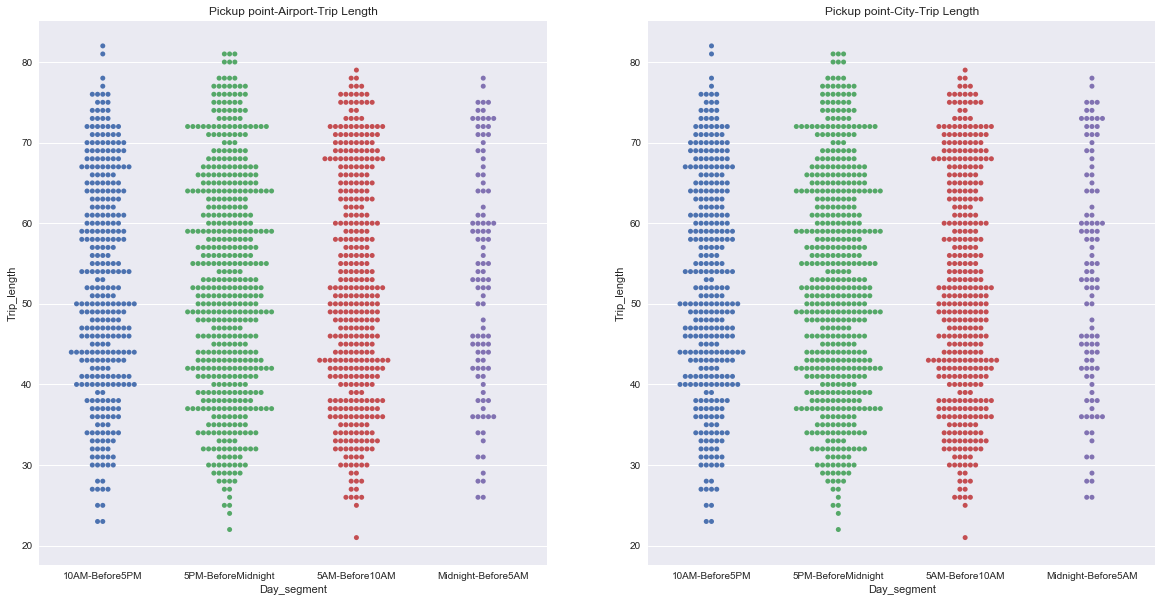

In [203]:
sns.set(font_scale=1)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.swarmplot(x="Day_segment",y="Trip_length",data=Airport_requests)
plt.title("Pickup point-Airport-Trip Length")
plt.subplot(122)
sns.swarmplot(x="Day_segment",y="Trip_length",data=Airport_requests)
plt.title("Pickup point-City-Trip Length")

In [204]:
uber.to_csv("uber_final.csv")

Next step would be to provide recommendation  in a presentation for solving this problem